<a href="https://colab.research.google.com/github/datascientist-ld1981/OpenCV/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request

image_urls = {


    "road_scene.jpg": "https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg",
    }

for filename, url in image_urls.items():
    try:
        print(f"Downloading {filename} ...")
        urllib.request.urlretrieve(url, filename)
        print(f"{filename} downloaded successfully.")
    except Exception as e:
        print(f"❌ Failed to download {filename}: {e}")

print("✅ All downloads complete!")


road_scene.jpg downloaded successfully.
✅ All downloads complete!


Thresholding helps us separate the important parts of an image from the background by turning it into only black and white.

Imagine you have a road image, and you want to clearly see the lane markings. Thresholding helps by:

✅ Making the lanes white
✅ Making the background black

This makes it easy for a computer to detect things like lanes, cars, or objects.
Load the image	We take the photo of the road.

2️⃣ Preprocess it	Turn it to grayscale, maybe remove noise.

3️⃣ Apply thresholding	Convert it to black and white to highlight the important parts (like lane markings).

4️⃣ Find features	Detect shapes, lines, or objects.

5️⃣ Make decisions	Count cars, detect lanes, find obstacles.

Why different types of thresholding?
**Simple Threshold**	:Works well on clear, bright images.

**Adaptive Threshold**	: It adjusts the threshold in small parts of the image to handle bright and dark areas.
Not sure what value to set

**Otsu's Threshold**	: Automatically finds the best value for you.

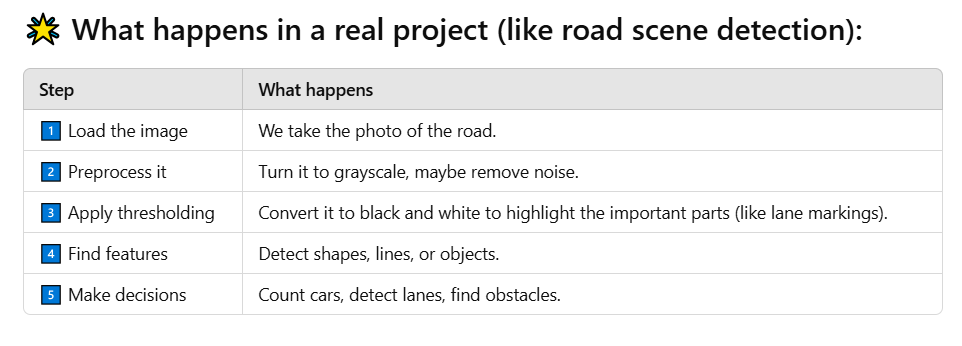

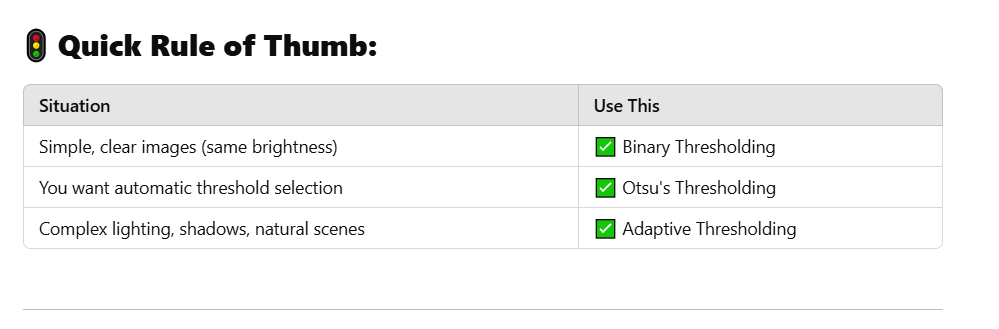

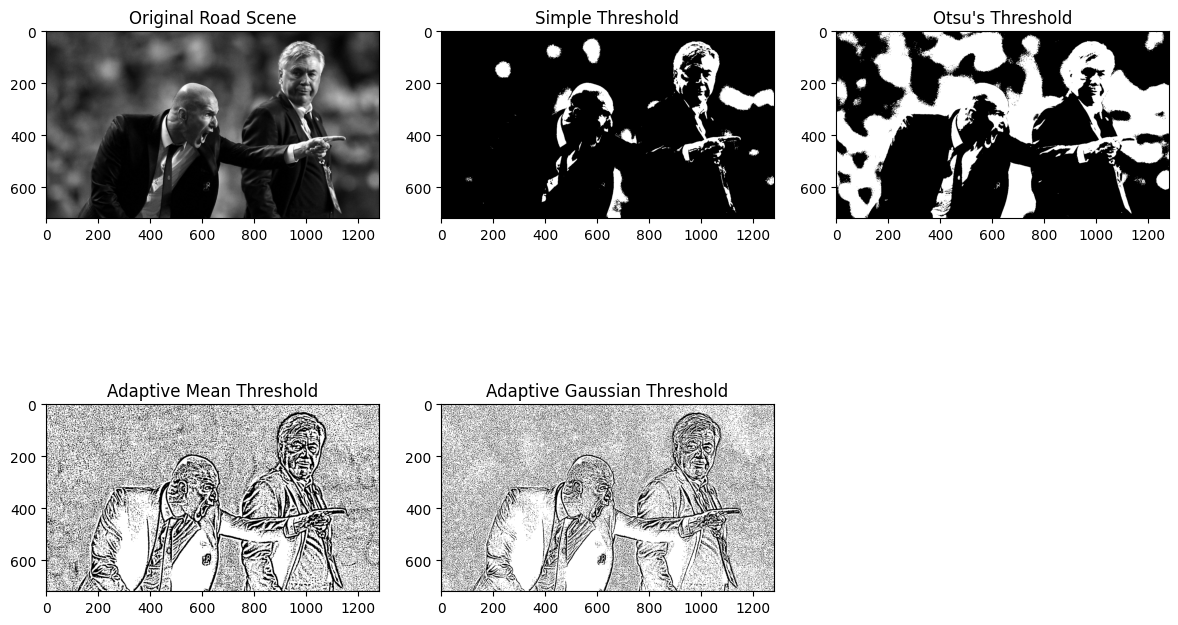

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the road scene image in grayscale
road_scene = cv2.imread('road_scene.jpg', cv2.IMREAD_GRAYSCALE)

# 1️⃣ Simple Binary Threshold
_, simple_thresh = cv2.threshold(road_scene, 127, 255, cv2.THRESH_BINARY)

# 2️⃣ Otsu's Thresholding
_, otsu_thresh = cv2.threshold(road_scene, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 3️⃣ Adaptive Mean Thresholding
adaptive_mean = cv2.adaptiveThreshold(
    road_scene, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY, 11, 2
)

# 4️⃣ Adaptive Gaussian Thresholding
adaptive_gaussian = cv2.adaptiveThreshold(
    road_scene, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 11, 2
)

# 🔍 Show all results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(road_scene, cmap='gray')
plt.title('Original Road Scene')

plt.subplot(2, 3, 2)
plt.imshow(simple_thresh, cmap='gray')
plt.title('Simple Threshold')

plt.subplot(2, 3, 3)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Threshold")

plt.subplot(2, 3, 4)
plt.imshow(adaptive_mean, cmap='gray')
plt.title('Adaptive Mean Threshold')

plt.subplot(2, 3, 5)
plt.imshow(adaptive_gaussian, cmap='gray')
plt.title('Adaptive Gaussian Threshold')

plt.tight_layout()
plt.show()


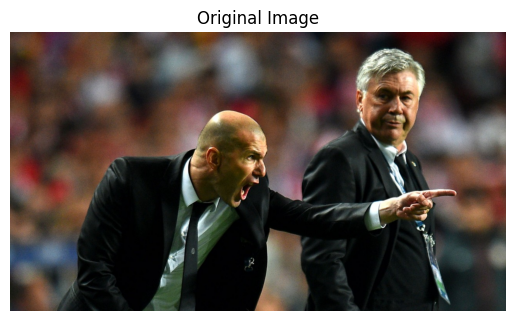

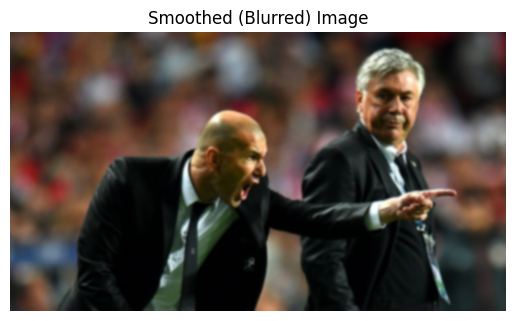

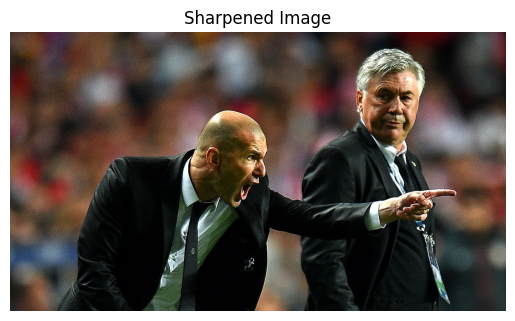

In [ ]:
#image filtering (smooothing ans sharpening)
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('road_scene.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show original
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()
# Apply Gaussian Blur (Smoothing)
smoothed = cv2.GaussianBlur(image, (15, 15), 0)

# Show smoothed image
plt.imshow(smoothed)
plt.title('Smoothed (Blurred) Image')
plt.axis('off')
plt.show()

#Sharpening
import numpy as np

# Sharpening kernel
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Apply sharpening
sharpened = cv2.filter2D(image, -1, sharpen_kernel)

# Show sharpened image
plt.imshow(sharpened)
plt.title('Sharpened Image')
plt.axis('off')
plt.show()



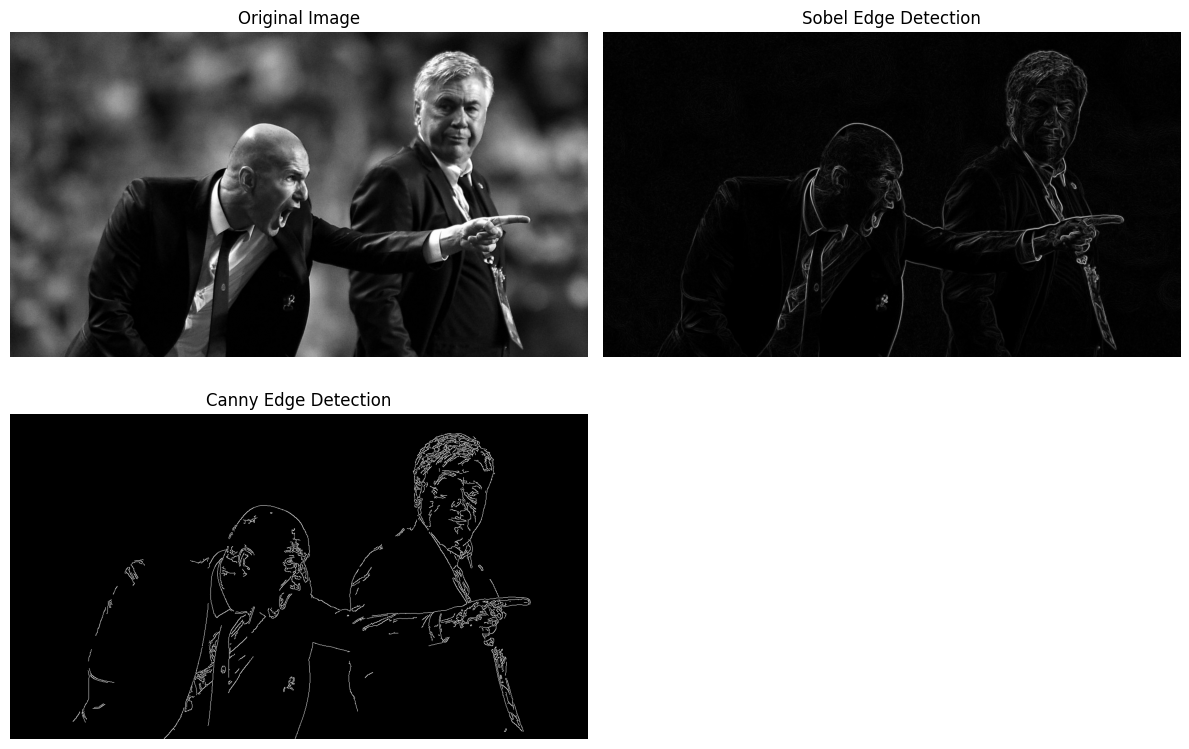

In [ ]:
#Edge Detection
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale (edge detection works best in grayscale)
image = cv2.imread('road_scene.jpg', cv2.IMREAD_GRAYSCALE)

# ✅ Apply Sobel Edge Detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Detect edges in X direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Detect edges in Y direction
sobel_combined = cv2.magnitude(sobel_x, sobel_y)       # Combine X and Y

# ✅ Apply Canny Edge Detection
canny_edges = cv2.Canny(image, threshold1=100, threshold2=200)

# ✅ Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


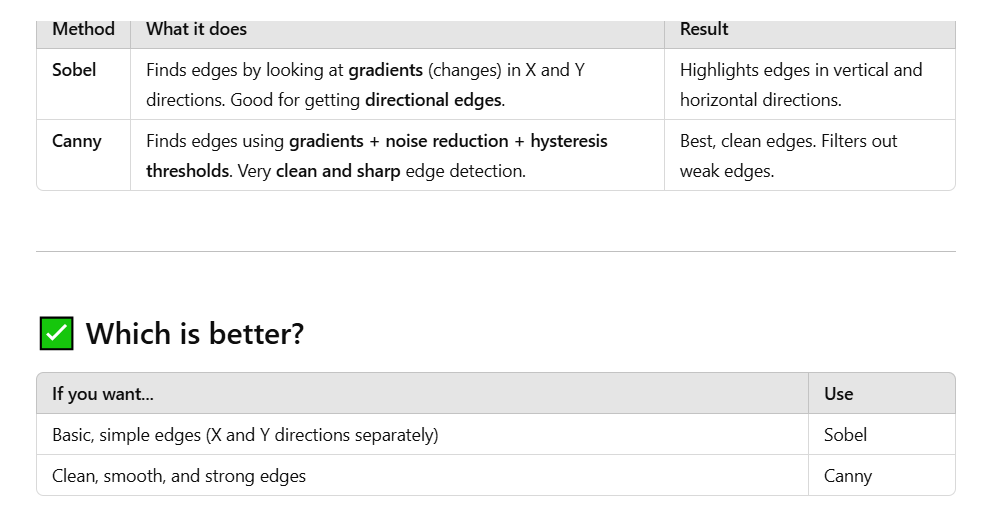

# **Geometric Transformation**

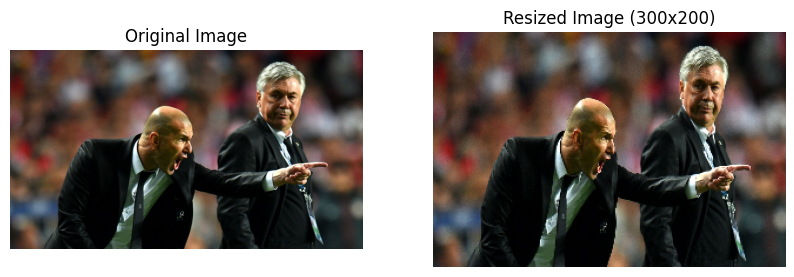

In [ ]:
# Program 1: Resizing the Image
# Original Image: road_scene.jpg
# Purpose: To resize the image to a smaller dimension (300x200 pixels)

import cv2
import matplotlib.pyplot as plt

# Load the original image
img = cv2.imread('road_scene.jpg')
img1=cv2.imread('ROSE.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert for correct color display

# Resize the image
resized = cv2.resize(img, (300, 200))

# Display both images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized)
plt.title('Resized Image (300x200)')
plt.axis('off')

plt.show()


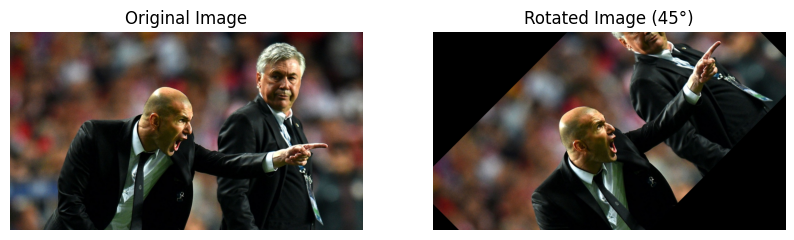

In [ ]:
# Program 2: Rotating the Image
# Original Image: road_scene.jpg
# Purpose: Rotate the image by 45 degrees around its center.

(h, w) = img.shape[:2]
center = (w // 2, h // 2)
matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(img, matrix, (w, h))

# Display both images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated)
plt.title('Rotated Image (45°)')
plt.axis('off')

plt.show()


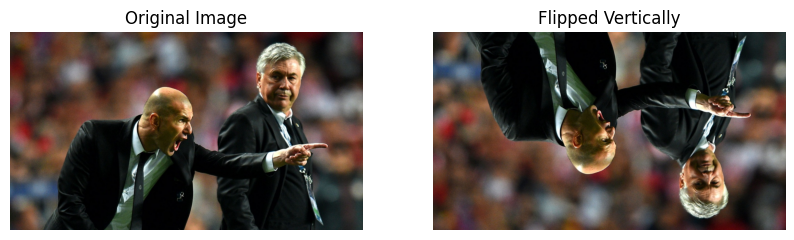

In [ ]:
# Program 3: Flipping the Image
# Original Image: road_scene.jpg
# Purpose: Flip the image vertically.

flip_vertical = cv2.flip(img, 0)

# Display both images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(flip_vertical)
plt.title('Flipped Vertically')
plt.axis('off')

plt.show()


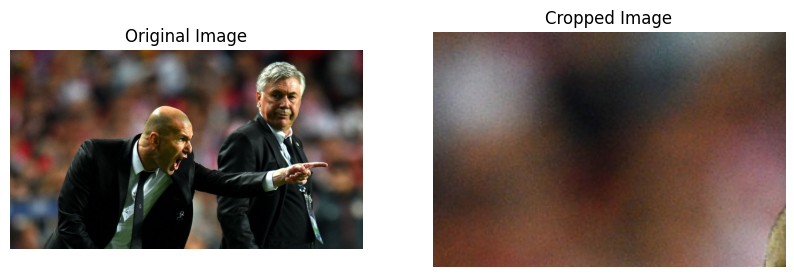

In [ ]:
# Program 4: Cropping the Image
# Original Image: road_scene.jpg
# Purpose: Crop a region from the image (from y=100:300 and x=200:500).

cropped = img[100:300, 200:500]

# Display both images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cropped)
plt.title('Cropped Image')
plt.axis('off')

plt.show()


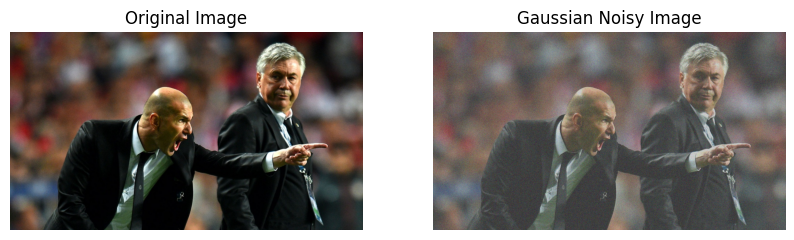

In [ ]:
# Program 5: Adding Gaussian Noise
# Purpose: Simulate noise in the image for testing robustness of filters.

import numpy as np

# Convert image to float32
noisy_img = img.astype(np.float32)
noise = np.random.normal(0, 25, img.shape).astype(np.float32)
gaussian_noisy_img = cv2.normalize(noisy_img + noise, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Display original and noisy images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gaussian_noisy_img, cmap='gray')
plt.title('Gaussian Noisy Image')
plt.axis('off')

plt.show()


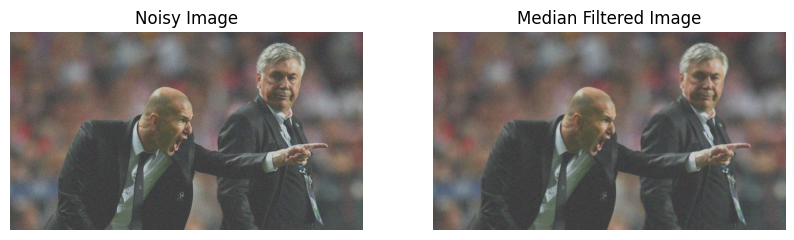

In [ ]:
# Program 6: Median Filtering
# Purpose: Remove salt-and-pepper noise while preserving edges.

median_filtered = cv2.medianBlur(gaussian_noisy_img, 5)

# Display noisy and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gaussian_noisy_img, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

plt.show()


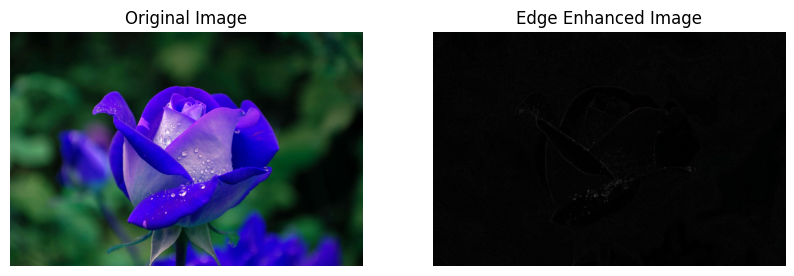

In [ ]:
# Program 7: Edge Enhancement with Laplacian
# Purpose: Sharpen and highlight edges in the image.

laplacian = cv2.Laplacian(img1, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Display original and edge-enhanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Edge Enhanced Image')
plt.axis('off')

plt.show()


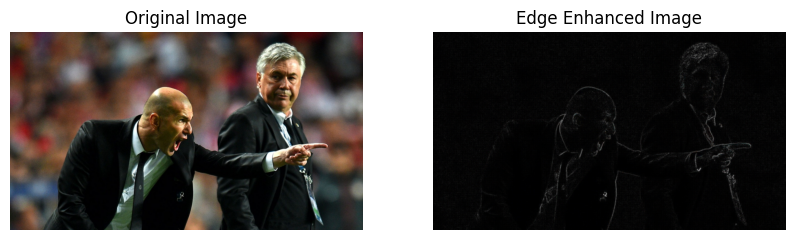

In [ ]:
# Program 7: Edge Enhancement with Laplacian
# Purpose: Sharpen and highlight edges in the image.

laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Display original and edge-enhanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Edge Enhanced Image')
plt.axis('off')

plt.show()

In [ ]:
# Program 8: Corner Detection (Harris)
# Purpose: Detect corner points in the image.

corner_img = np.copy(cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR))
corners = cv2.cornerHarris(np.float32(img), 2, 3, 0.04)
corner_img[corners > 0.01 * corners.max()] = [255, 0, 0]

# Display original and corner-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(corner_img)
plt.title('Corners Detected')
plt.axis('off')

plt.show()


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-15:Bad number of channels) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<1>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3


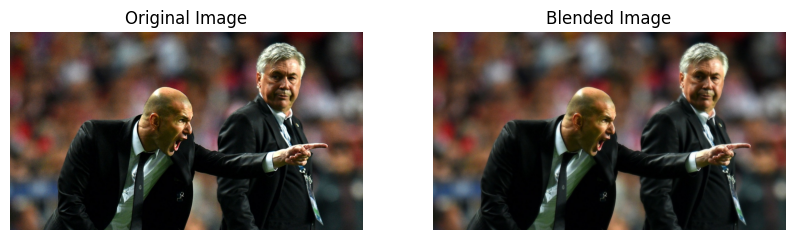

In [ ]:
# Program 9: Image Blending
# Purpose: Blend two copies of the same image with different weights.

img2 = cv2.GaussianBlur(img, (21, 21), 0)
blended = cv2.addWeighted(img, 0.7, img2, 0.3, 0)

# Display original and blended images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blended, cmap='gray')
plt.title('Blended Image')
plt.axis('off')

plt.show()


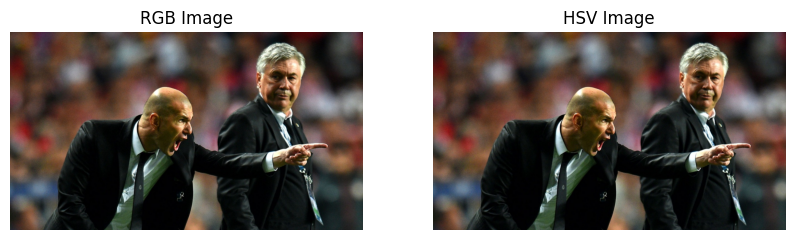

In [ ]:
# Program 10: Color Space Conversion
# Original Image: road_scene.jpg (color)
# Purpose: Convert the image from RGB to HSV color space.

img_color = cv2.imread('road_scene.jpg')
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

# Display RGB and HSV images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB))
plt.title('HSV Image')
plt.axis('off')

plt.show()


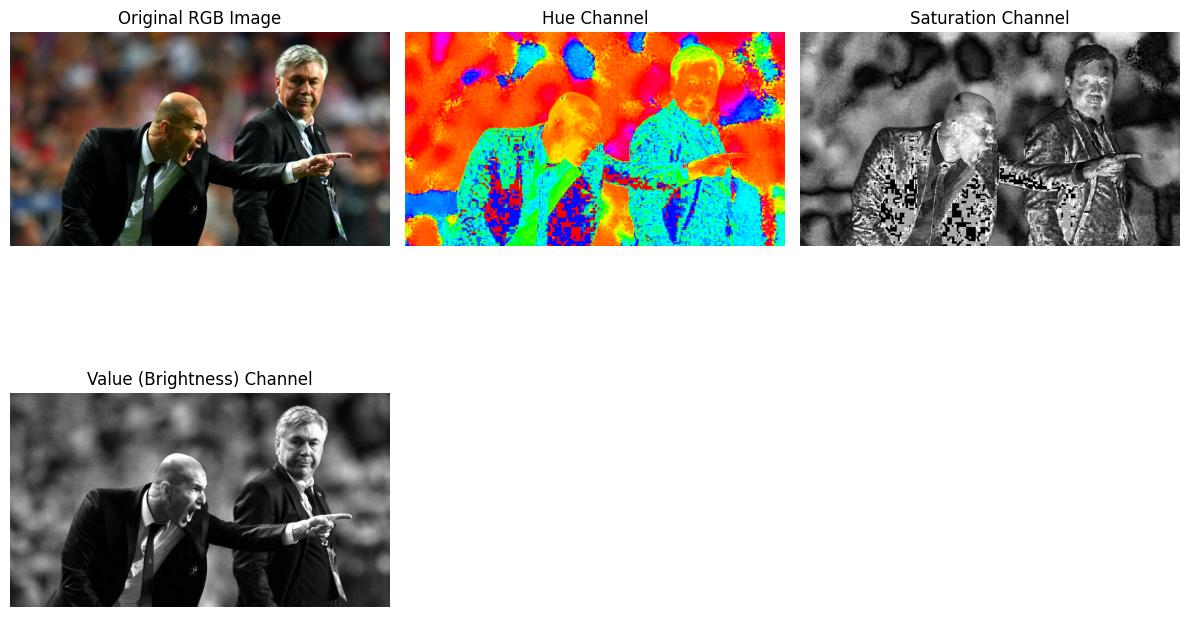

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load color image
img_bgr = cv2.imread('road_scene.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Convert to HSV
hsv_img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Split the HSV channels
h, s, v = cv2.split(hsv_img)

# Display original image and HSV channels
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title('Original RGB Image')
plt.axis('off')

# Hue Channel
plt.subplot(2, 3, 2)
plt.imshow(h, cmap='hsv')
plt.title('Hue Channel')
plt.axis('off')

# Saturation Channel
plt.subplot(2, 3, 3)
plt.imshow(s, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

# Value Channel
plt.subplot(2, 3, 4)
plt.imshow(v, cmap='gray')
plt.title('Value (Brightness) Channel')
plt.axis('off')

plt.tight_layout()
plt.show()


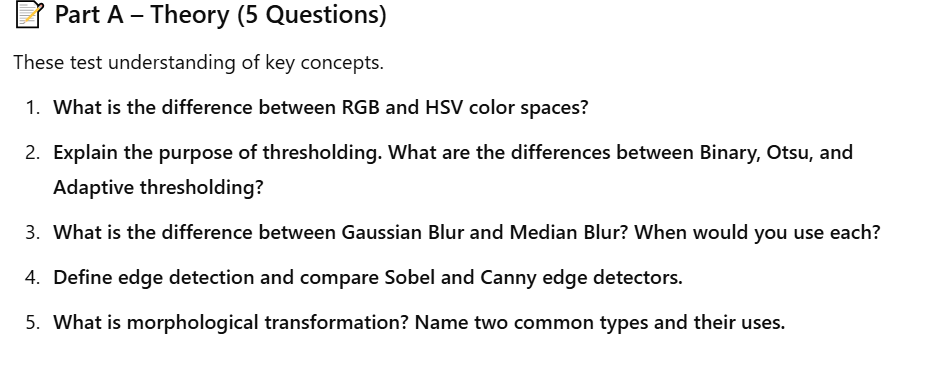

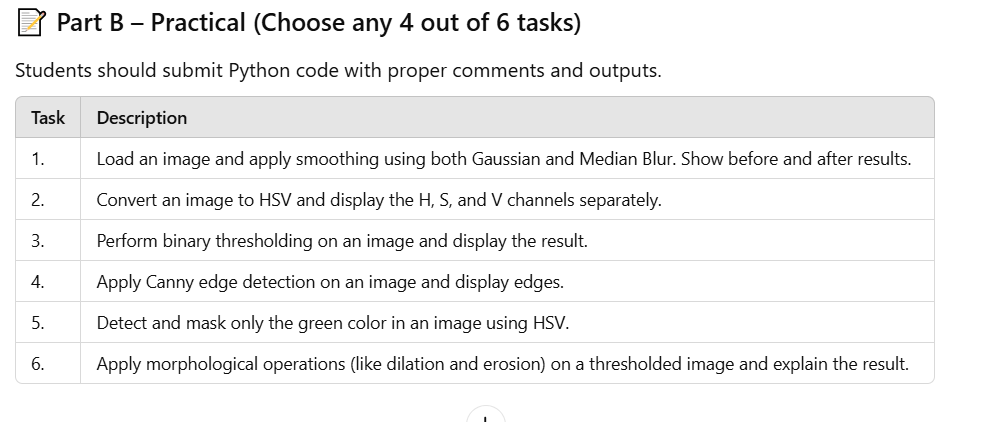